In [19]:
import numpy as np
import matplotlib.pyplot as plt

p0 = (1, 0)

p1 = (1, v)

p2 = (v, 1)

p3 = (0, 1)

In [15]:
def bezier(ls_pts, numpts):
    #initializing p0, p1, p2, p3
    p0_x, p0_y = ls_pts[0]
    p1_x, p1_y = ls_pts[1]
    p2_x, p2_y = ls_pts[2]
    p3_x, p3_y = ls_pts[3]
    #defining the bezier curve
    t = np.linspace(0, 1, numpts).reshape(numpts, 1)
    b_x = (p0_x*((1-t)**3) + p1_x*3*t*((1-t)**2) + p2_x*3*(1-t)*(t**2) + p3_x*(t**3)).reshape(-1) #using reshape oto make a one dimensional array
    b_y = (p0_y*((1-t)**3) + p1_y*3*t*((1-t)**2) + p2_y*3*(1-t)*(t**2) + p3_y*(t**3)).reshape(-1)
    return b_x, b_y


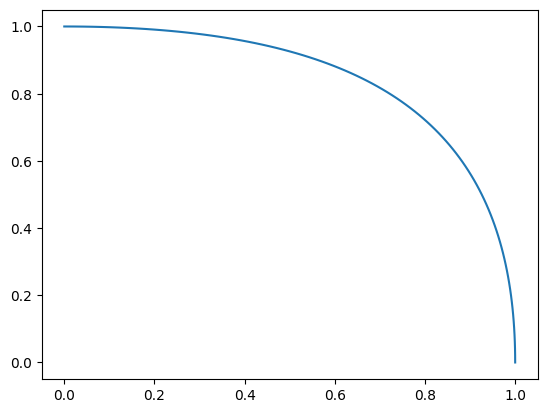

In [24]:
#example:
ls_pts = [(1,0), (1, 0.7), (0.7, 1), (0, 1)]
x, y = bezier(ls_pts, 100)
plt.plot(x, y)


In [28]:
#area of a curve: we can compute it with trapezoidal rule as an approximation
#x and y are 
def area_under_curve(x: np.array, y:np.array):
    width = abs(np.diff(x)) #calculates the difference in the numpy array so we get the width of each trapezoid
    areas = width * (y[:-1] + y[1:]) / 2 #y coordinates of the left and the right of the current trapezoid
    totalarea = np.sum(areas)
    return totalarea

In [31]:
#trying with the points defined above
area_under_curve(x, y)
#the optimal v will have the area close to pi/4

0.8464660747445745

In [ ]:
#now we need to find v such that the length of the curve is equal to pi/2

In [32]:
def length_of_curve(x, y):
    dx = np.diff(x)
    dy = np.diff(y)
    sumdiffs = dx ** 2 + dy ** 2
    sumdiffsroot = np.sqrt(sumdiffs)
    length = np.sum(sumdiffsroot)
    return length

In [35]:
#trying with the points defined above
length_of_curve(x, y)
#the length of this curve should be close to pi/2

1.639347327858533

### finding the optimal v value

In [ ]:
#we need the area under the curve to be close to pi/4
#we need the length of the curve to be close to pi/2
#I choose the range of v to be between 0 and 1 - a circle with radius 1 has area pi, meaning that a quarter of a circle with radius 1 has area pi/4. so it makes sense that v is ranged between 0 and 1.


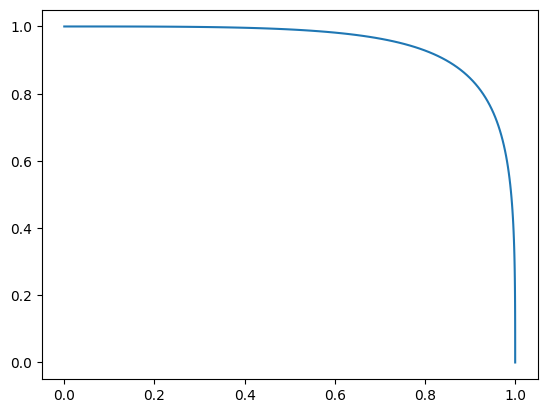

In [43]:
#setting v = 1
v = 1
ls_pts = [(1,0), (1, v), (v, 1), (0, 1)]
x, y = bezier(ls_pts, 100)
plt.plot(x, y)

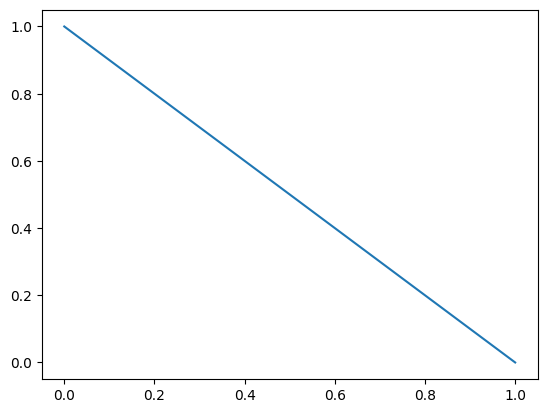

In [44]:
#setting v = 0
v = 0
ls_pts = [(1,0), (1, v), (v, 1), (0, 1)]
x, y = bezier(ls_pts, 100)
plt.plot(x, y)

In [54]:
import pandas as pd

In [58]:
#so v is somewhere between these 2 values.
varray = np.linspace(0, 1, 100)
vs = []
areas = []
lengths = []
for v in varray:
    ls_pts = [(1,0), (1, v), (v, 1), (0, 1)]
    #print(f"v value is {v}")
    b_x, b_y = bezier(ls_pts, 100)
    area = area_under_curve(b_x, b_y)
    #print(f"area is {area}")
    areaminuspio4 = abs(area - np.pi/4)
    #print(f"area minus pi over 4 is {areaminuspio4}")
    length = length_of_curve(b_x, b_y)
    #print(f"length is {length}")
    lengthminuspio2 = abs(length - np.pi/2)
    #print(f"length minus pi over 2 is {lengthminuspio2}")
    ls = [v, areaminuspio4, lengthminuspio2]
    vs.append(v)
    areas.append(areaminuspio4)
    lengths.append(lengthminuspio2)

print(vs)
print(areas)
print(lengths)

[0.0, 0.010101010101010102, 0.020202020202020204, 0.030303030303030304, 0.04040404040404041, 0.05050505050505051, 0.06060606060606061, 0.07070707070707072, 0.08080808080808081, 0.09090909090909091, 0.10101010101010102, 0.11111111111111112, 0.12121212121212122, 0.13131313131313133, 0.14141414141414144, 0.15151515151515152, 0.16161616161616163, 0.17171717171717174, 0.18181818181818182, 0.19191919191919193, 0.20202020202020204, 0.21212121212121213, 0.22222222222222224, 0.23232323232323235, 0.24242424242424243, 0.25252525252525254, 0.26262626262626265, 0.27272727272727276, 0.2828282828282829, 0.29292929292929293, 0.30303030303030304, 0.31313131313131315, 0.32323232323232326, 0.33333333333333337, 0.3434343434343435, 0.3535353535353536, 0.36363636363636365, 0.37373737373737376, 0.38383838383838387, 0.393939393939394, 0.4040404040404041, 0.4141414141414142, 0.42424242424242425, 0.43434343434343436, 0.4444444444444445, 0.4545454545454546, 0.4646464646464647, 0.4747474747474748, 0.4848484848484

In [59]:
#creating a dataframe with these values
data = pd.DataFrame({"V":vs, "Area":areas, "Length":lengths})
data

,V,Area,Length
0,0.000000,0.285398,0.156583
1,0.010101,0.279354,0.156381
2,0.020202,0.273340,0.155881
3,0.030303,0.267357,0.155157
4,0.040404,0.261405,0.154248
...,...,...,...
95,0.959596,0.152208,0.207617
96,0.969697,0.155346,0.213492
97,0.979798,0.158454,0.219403
98,0.989899,0.161530,0.225347


In [61]:
#we want the areas and the lengths closest to 0 because we have subtracted pi/4 and pi/2 to each of the values
sorted = data.sort_values(by = ["Area", "Length"], ascending=True)
sorted

,V,Area,Length
55,0.555556,0.001606,0.001626
54,0.545455,0.002786,0.002753
56,0.565657,0.005967,0.006046
53,0.535354,0.007209,0.007091
57,0.575758,0.010298,0.010506
...,...,...,...
4,0.040404,0.261405,0.154248
3,0.030303,0.267357,0.155157
2,0.020202,0.273340,0.155881
1,0.010101,0.279354,0.156381


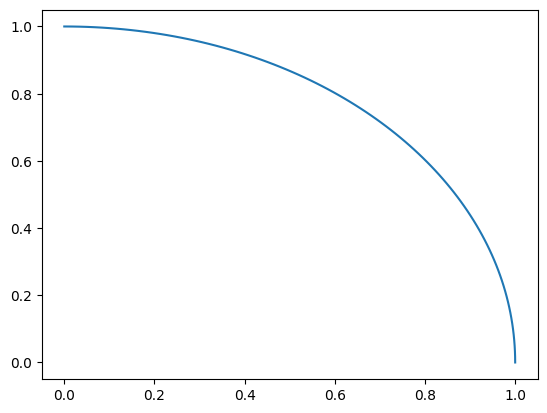

In [68]:
#we have therefore seen that v = 0.5 recurring is the value of v that, in this case, ensures the curve is mostly equal to the circle.
#plotting this:
v = sorted.iloc[0, 0]
ls_pts = [(1,0), (1, v), (v, 1), (0, 1)]
x, y = bezier(ls_pts, 100)
plt.plot(x, y)

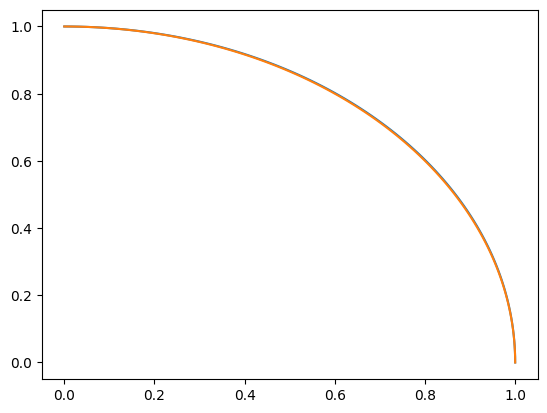

In [69]:
#adding the quarter circle:
v = sorted.iloc[0, 0]
ls_pts = [(1,0), (1, v), (v, 1), (0, 1)]
x, y = bezier(ls_pts, 100)
plt.plot(x, y)
angles = np.linspace(0, np.pi/2, 100)
xc = np.cos(angles)
yc = np.sin(angles)
plt.plot(xc, yc)
plt.show()

In [70]:
#they are similar as they overlap.

In [71]:
#however, this was only testing 100 values of v between 0 and 1. we can increase this so that more values of v are tested for:
#so v is somewhere between these 2 values.
def optimal_v_value(iters):

    varray = np.linspace(0, 1, iters)

    vs = []
    areas = []
    lengths = []
    for v in varray:
        ls_pts = [(1,0), (1, v), (v, 1), (0, 1)]
        #print(f"v value is {v}")
        b_x, b_y = bezier(ls_pts, 100)
        area = area_under_curve(b_x, b_y)
        #print(f"area is {area}")
        areaminuspio4 = abs(area - np.pi/4)
        #print(f"area minus pi over 4 is {areaminuspio4}")
        length = length_of_curve(b_x, b_y)
        #print(f"length is {length}")
        lengthminuspio2 = abs(length - np.pi/2)
        #print(f"length minus pi over 2 is {lengthminuspio2}")
        ls = [v, areaminuspio4, lengthminuspio2]
        vs.append(v)
        areas.append(areaminuspio4)
        lengths.append(lengthminuspio2)
    
    data = pd.DataFrame({"V":vs, "Area":areas, "Length":lengths})
    sorted = data.sort_values(by = ["Area", "Length"], ascending=True)
    v = sorted.iloc[0, 0]
    return v

In [74]:
v1000 = optimal_v_value(1000)
print(f"v1000 = {v1000}")
v10000 = optimal_v_value(10000)
print(f"v10000 = {v10000}")
v100000 = optimal_v_value(100000)
print(f"v100000 = {v100000}")

v1000 = 0.5515515515515516
v10000 = 0.5518551855185518
v100000 = 0.5518555185551856
